In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install statsmodels
!pip install matplotlib
!pip install feature-engine



  Using cached numpy-1.25.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached pandas-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached contourpy-1.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-manylinux

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import feature_engine



In [3]:
!pip install scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import sklearn


In [5]:
from sklearn.pipeline import Pipeline

### first_pipeline = Pipeline([
    (A set of estimators are arranged in series when training a machine learning model).....In ML pipelines, the last step will. be the ML model, and the precedent steps will prepare the data for the model.......We use a set of methods in the pipeline so we can first learn the data parameters and transform the data after and secondly we rain the ML model and run predictions. 

    .fit() learns from the data. .transform() transforms the data. We will see a combination of using feature-engine "alone" and assembled in a pipeline, so you can get used to different coding situations. 

## Handle Missing Data
#### Mean, Median Imputer (Only numerical values)
#### Arbitrary Number Imputer (Determined by the user)
#### Categorical Imputer
#### Drop Missing Data

In [8]:
### Mean Median Imputer

from feature_engine.imputation import MeanMedianImputer

In [4]:
df = sns.load_dataset('penguins')
df = df.sample(frac=0.5, random_state=5)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,Female
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,Female
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,Male
42,Adelie,Dream,36.0,18.5,186.0,3100.0,Female


In [11]:
df.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  7
dtype: int64

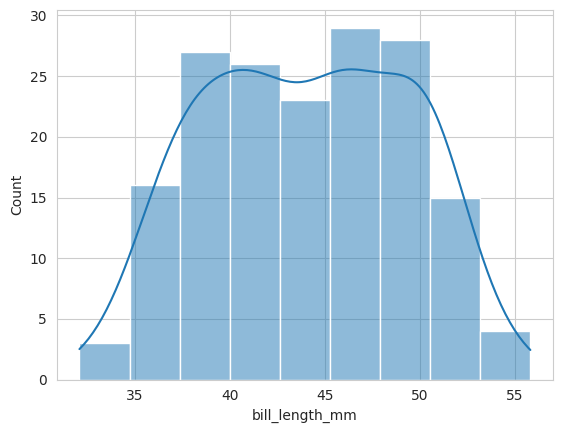

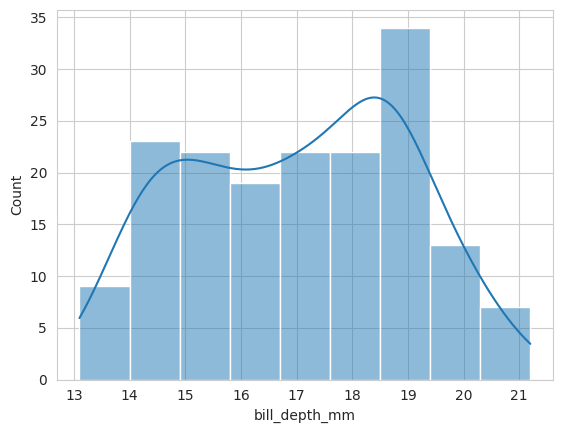

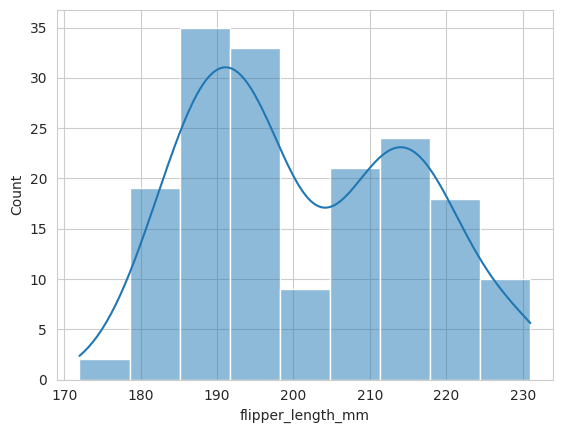

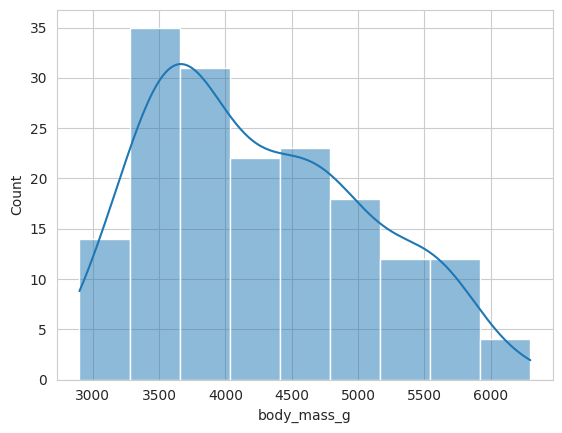

In [18]:
sns.set_style('whitegrid')
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    sns.histplot(data=df, x=col, kde=True)
    plt.show()
    print('\n')

In [19]:
from feature_engine.imputation import MeanMedianImputer
imputer = MeanMedianImputer(imputation_method='median',
                            variables=['bill_length_mm', 'bill_depth_mm', 
                                       'flipper_length_mm', 'body_mass_g'])

In [20]:
imputer.fit(df)

MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                             'flipper_length_mm', 'body_mass_g'])

In [21]:
imputer.imputer_dict_

{'bill_length_mm': 44.5,
 'bill_depth_mm': 17.1,
 'flipper_length_mm': 198.0,
 'body_mass_g': 4100.0}

In [22]:
df = imputer.transform(df)

In [24]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

### Let's arrange the imputation method inside a Pipeline

In [25]:
df = sns.load_dataset('penguins')
df = df.sample(frac=0.5, random_state=5)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,Female
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,Female
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,Male
42,Adelie,Dream,36.0,18.5,186.0,3100.0,Female


In [26]:
pipeline = Pipeline([
    ('median', MeanMedianImputer(imputation_method='median',
                                 variables=['bill_length_mm', 'bill_depth_mm', 
                                       'flipper_length_mm', 'body_mass_g']) )
])               
pipeline                

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g']))])

In [27]:
pipeline.fit(df)

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g']))])

In [28]:
df = pipeline.transform(df)

In [29]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [30]:
pipeline['median']

MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                             'flipper_length_mm', 'body_mass_g'])

In [32]:
pipeline

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g']))])

In [33]:
pipeline['median'].imputer_dict_

{'bill_length_mm': 44.5,
 'bill_depth_mm': 17.1,
 'flipper_length_mm': 198.0,
 'body_mass_g': 4100.0}

### Arbitrary Number (determined by the user)

In [34]:
from feature_engine.imputation import ArbitraryNumberImputer

In [35]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,Female
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,Female
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,Male
42,Adelie,Dream,36.0,18.5,186.0,3100.0,Female
...,...,...,...,...,...,...,...
186,Chinstrap,Dream,49.7,18.6,195.0,3600.0,Male
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
34,Adelie,Dream,36.4,17.0,195.0,3325.0,Female
248,Gentoo,Biscoe,48.2,14.3,210.0,4600.0,Female


In [39]:
df = sns.load_dataset('penguins')
df = df.sample(frac=0.5, random_state=5)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,Female
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,Female
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,Male
42,Adelie,Dream,36.0,18.5,186.0,3100.0,Female


In [40]:
df.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  7
dtype: int64

In [41]:
pipeline = Pipeline([
    ('bill_length_mm', ArbitraryNumberImputer(arbitrary_number=-100,
                                              variables=['bill_length_mm']) ),
    ('other_variables', ArbitraryNumberImputer(arbitrary_number=-500,
                                               variables=['bill_depth_mm', 
                                                          'flipper_length_mm', 'body_mass_g']) )                                 
                                 
])               
pipeline         

Pipeline(steps=[('bill_length_mm',
                 ArbitraryNumberImputer(arbitrary_number=-100,
                                        variables=['bill_length_mm'])),
                ('other_variables',
                 ArbitraryNumberImputer(arbitrary_number=-500,
                                        variables=['bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']))])

In [42]:
pipeline.fit(df)

Pipeline(steps=[('bill_length_mm',
                 ArbitraryNumberImputer(arbitrary_number=-100,
                                        variables=['bill_length_mm'])),
                ('other_variables',
                 ArbitraryNumberImputer(arbitrary_number=-500,
                                        variables=['bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']))])

In [43]:
df = pipeline.transform(df)

In [44]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [45]:
pipeline['bill_length_mm'].imputer_dict_

{'bill_length_mm': -100}

In [46]:
pipeline['other_variables'].imputer_dict_

{'bill_depth_mm': -500, 'flipper_length_mm': -500, 'body_mass_g': -500}

### Categorical Imputer ---- either replace with missing or use the most frequent value

In [5]:
df = df.sample(n=50, random_state=1)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  3
dtype: int64

In [6]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
25,Adelie,Biscoe,35.3,18.9,187.0,3800.0,Female
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male
21,Adelie,Biscoe,37.7,18.7,180.0,3600.0,Male
157,Chinstrap,Dream,45.2,17.8,198.0,3950.0,Female
314,Gentoo,Biscoe,44.5,14.7,214.0,4850.0,Female


In [7]:
df['sex'].value_counts()

sex
Female    25
Male      22
Name: count, dtype: int64

In [14]:
from feature_engine.imputation import CategoricalImputer
pipeline = Pipeline([
    ('categorical_imputer', CategoricalImputer(imputation_method='missing',
                                               fill_value='Missing',
                                               variables=['sex']) )
    
])              
pipeline

Pipeline(steps=[('categorical_imputer', CategoricalImputer(variables=['sex']))])

In [15]:
df = pipeline.fit_transform(df)

In [16]:
df['sex'].value_counts()

sex
Female     25
Male       22
Missing     3
Name: count, dtype: int64

In [23]:
df = sns.load_dataset('penguins')

In [24]:
from feature_engine.imputation import CategoricalImputer
pipeline = Pipeline([
    ('categorical_imputer', CategoricalImputer(imputation_method='frequent',
                                               variables=['sex']) )
])              
df = pipeline.fit_transform(df)

In [25]:
df['sex'].value_counts()

sex
Male      179
Female    165
Name: count, dtype: int64

### Drop Missing Data

In [26]:
from feature_engine.imputation import DropMissingData

In [34]:
df = sns.load_dataset('penguins')
df.isnull().sum()
print(df.shape)

(344, 7)


In [35]:
pipeline = Pipeline([
    ('drop_na', DropMissingData())
])
df = pipeline.fit_transform(df)

In [36]:
df.isnull().sum()
print(df.shape)

(333, 7)


## Handle Variable Encoding

#### OneHotEncoder() Takes value 0 or 1

In [37]:
from feature_engine.encoding import OneHotEncoder

In [44]:
df = sns.load_dataset('penguins').filter(['species', 'island', 'sex'])
df.head()

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,Female


In [45]:
pipeline = Pipeline([
    ('drop_na', DropMissingData()),
    ('ohe', OneHotEncoder(variables=['species', 'island', 'sex'], drop_last=True))
])
df = pipeline.fit_transform(df)
df

,species_Adelie,species_Chinstrap,island_Torgersen,island_Biscoe,sex_Male
0,1,0,1,0,1
1,1,0,1,0,0
2,1,0,1,0,0
4,1,0,1,0,0
5,1,0,1,0,1
...,...,...,...,...,...
338,0,0,0,1,0
340,0,0,0,1,0
341,0,0,0,1,1
342,0,0,0,1,0


### Ordinal Encoder ---- Replaces categories with ordinal numbers such as 0, 1, 2, 3 etc.

In [46]:
from feature_engine.encoding import OrdinalEncoder

In [55]:
df = sns.load_dataset('penguins').filter(['species', 'island', 'sex'])
df.head()

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,Female


In [56]:
pipeline = Pipeline([
    ('drop_na', DropMissingData()),
    ('ordinal_encoder', OrdinalEncoder(encoding_method= 'arbitrary'))
])
df = pipeline.fit_transform(df)
df

,species,island,sex
0,0,0,0
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,0
...,...,...,...
338,2,1,1
340,2,1,1
341,2,1,0
342,2,1,1


In [57]:
for col in df.columns.to_list():
    print(f"{col} \n{df[col].value_counts()} \n\n")

species 
species
0    146
2    119
1     68
Name: count, dtype: int64 


island 
island
1    163
2    123
0     47
Name: count, dtype: int64 


sex 
sex
0    168
1    165
Name: count, dtype: int64 




In [58]:
pipeline['ordinal_encoder'].encoder_dict_


{'species': {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2},
 'island': {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2},
 'sex': {'Male': 0, 'Female': 1}}

### Rare 
#### When a value is less then x amount that we decide. Let's say fruits and percentage of rows for one of three fruits
### is < 6% those labels will be replaced with the word 'Rare' so we don't over fit the model. 

In [59]:
### Feature Engine Unit3 Handle Categorical Variable Encoding pages 8, 9, 10, 11

### Handle Numerical Variable Transformation ----- Objective is to transform variabl distribution closer to a normal distribution
#### LogTransformer
#### ReciprocalTransformer
#### PoweTransformer
#### BoxCoxTransformer
#### YeoJohnsonTransformer

#### LogTransofmer

In [6]:
from feature_engine import transformation as vt

In [6]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 18.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=65e35a7f8a9551ed968542b52b4d1a4be95183f5fa5f43e2ff1ab4f8ec95ffd7
  Stored in directory: /workspace/.pyenv_mirror/pip_cache/wheels/17/8d/65/9a39917567093c895549811c172be5d2dfb63c7e4b143e05a4
Successfully built littleutils

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [8]:
import pingouin as pg

In [9]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing

data_cali = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data_cali.data, columns=data_cali.feature_names)
df['target'] = pd.Series(data_cali.target)
df = df.filter(['MedInc', 'HouseAge', 'target'])

df.head()

,MedInc,HouseAge,target
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


In [10]:
df.head()

,MedInc,HouseAge,target
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


*** MedInc ***


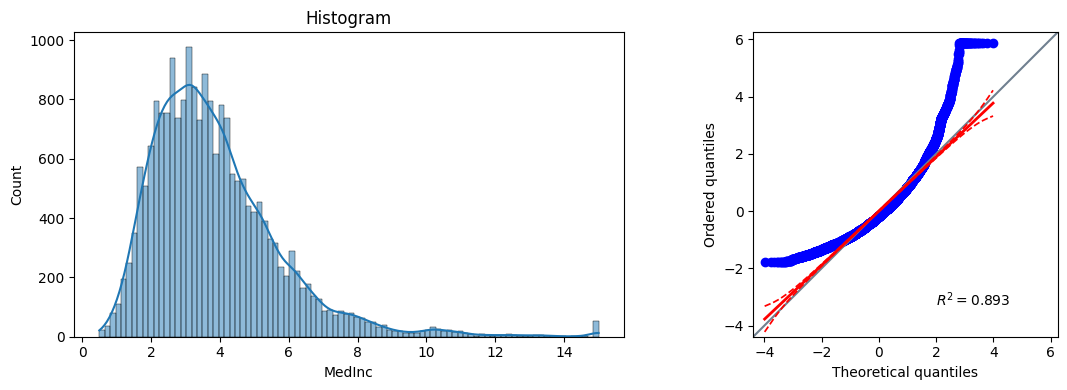

before apply transformation | skewness: 1.65 | kurtosis: 1.65


*** HouseAge ***


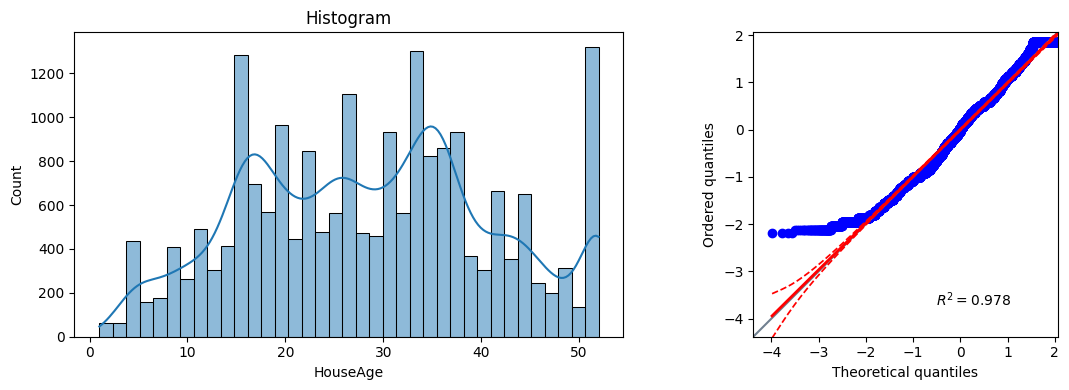

before apply transformation | skewness: 0.06 | kurtosis: 0.06


*** target ***


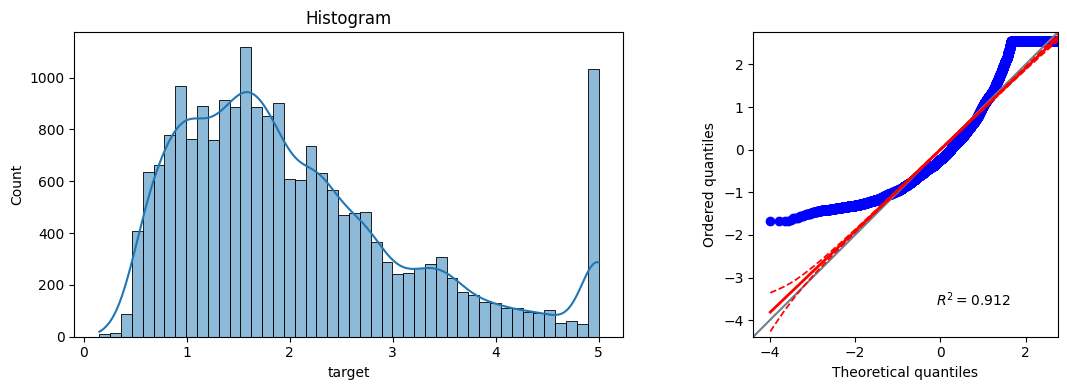

before apply transformation | skewness: 0.98 | kurtosis: 0.98




In [14]:
def calculate_skew_kurtosis(df, col, moment):
    print(f"{moment} | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].skew().round(2)}")

def distribution_before_applying_transformer(df):
    for col in df.columns:
        print(f"*** {col} ***")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        sns.histplot(data=df, x=col, kde=True, ax=axes[0])
        axes[0].set_title("Histogram")
        pg.qqplot(df[col], dist='norm', ax=axes[1])
        plt.tight_layout()
        plt.show()
        calculate_skew_kurtosis(df, col, 'before apply transformation')
        print("\n")
distribution_before_applying_transformer(df)


In [15]:
pipeline = Pipeline([
    ( 'log', vt.LogTransformer())
])

df_transformed = pipeline.fit_transform(df)
df_transformed.head()


,MedInc,HouseAge,target
0,2.119287,3.713572,1.509839
1,2.116424,3.044522,1.276758
2,1.982022,3.951244,1.258745
3,1.730434,3.951244,1.227592
4,1.347086,3.951244,1.230225


*** MedInc ***
Before | skewness: 1.65 | kurtosis: 1.65
After | skewness: -0.15 | kurtosis: -0.15


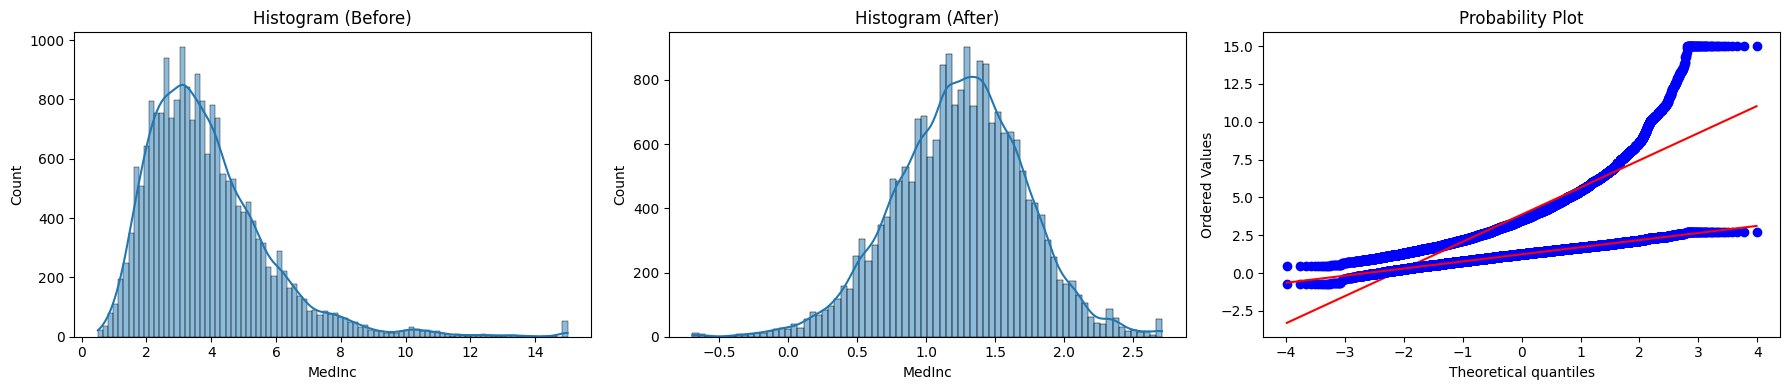



*** HouseAge ***
Before | skewness: 0.06 | kurtosis: 0.06
After | skewness: -1.29 | kurtosis: -1.29


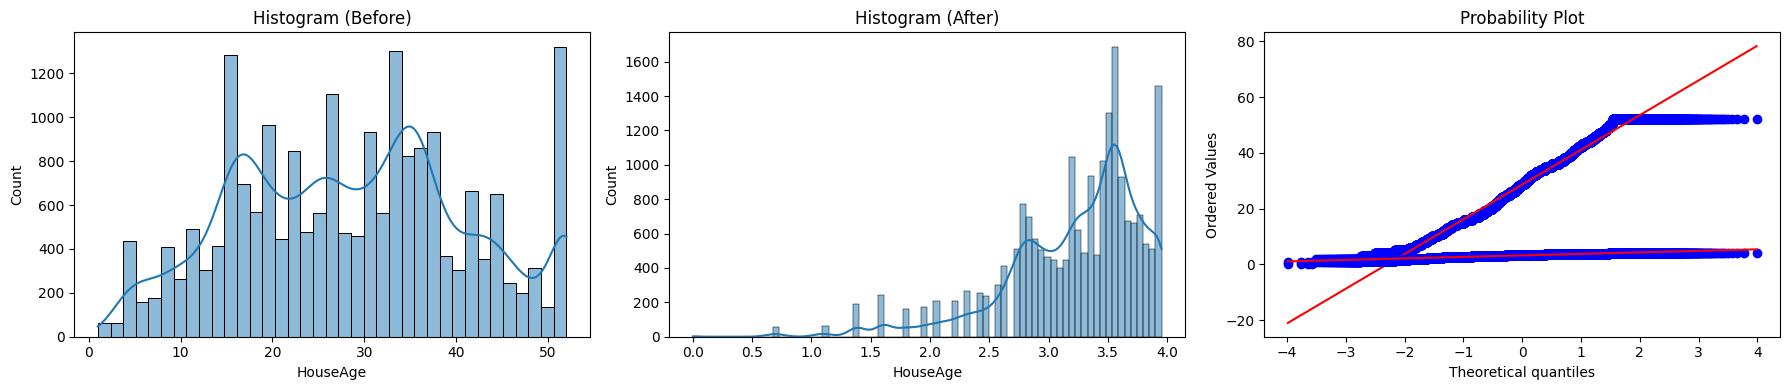



*** target ***
Before | skewness: 0.98 | kurtosis: 0.98
After | skewness: -0.17 | kurtosis: -0.17


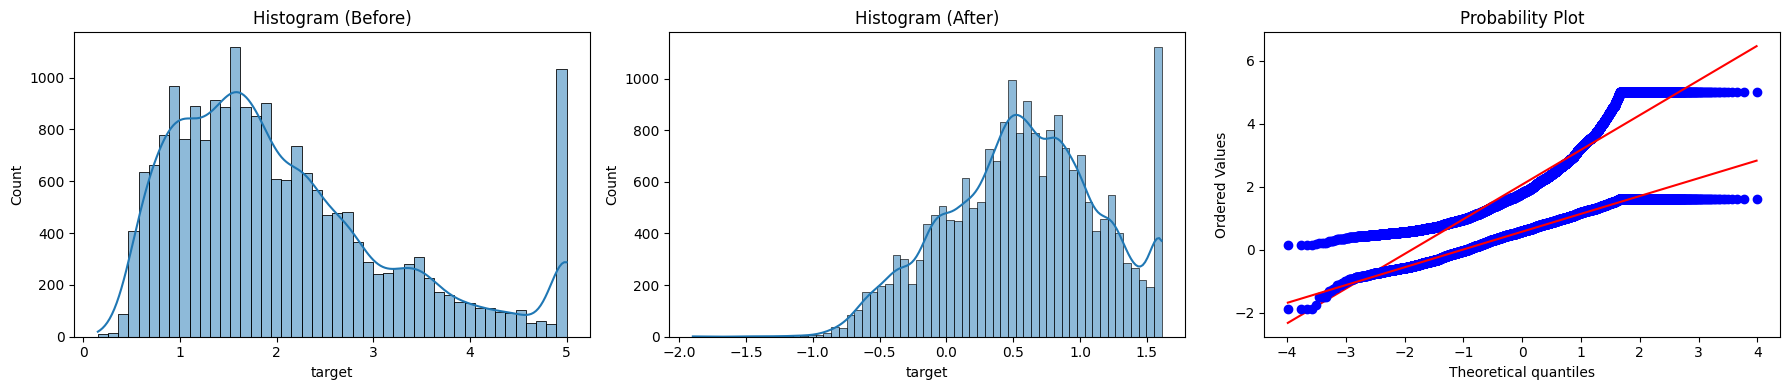

In [16]:
import scipy.stats as stats

def distribution_before_and_after_transformer(df, df_transformed):
    for col in df.columns:
        print(f"*** {col} ***")
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

        # Plot histogram before transformation
        axes[0].set_title("Histogram (Before)")
        sns.histplot(data=df, x=col, kde=True, ax=axes[0])
        calculate_skew_kurtosis(df, col, 'Before')

        # Plot histogram after transformation
        axes[1].set_title("Histogram (After)")
        sns.histplot(data=df_transformed, x=col, kde=True, ax=axes[1])
        calculate_skew_kurtosis(df_transformed, col, 'After')

        # Plot QQ plot before and after transformation
        axes[2].set_title("QQ Plot")
        stats.probplot(df[col], dist='norm', plot=axes[2])
        stats.probplot(df_transformed[col], dist='norm', plot=axes[2])

        plt.tight_layout()
        plt.show()
        print("\n")

# Call the function to compare before and after transformation
distribution_before_and_after_transformer(df, df_transformed)


#### Reciprocal Transformer 1/x = 0 handles 0 is variables. 

In [39]:
data_cali = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data_cali.data, columns=data_cali.feature_names)
df['target'] = pd.Series(data_cali.target)
df = df.filter(['MedInc', 'HouseAge', 'target'])
df.head()

,MedInc,HouseAge,target
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


*** MedInc ***


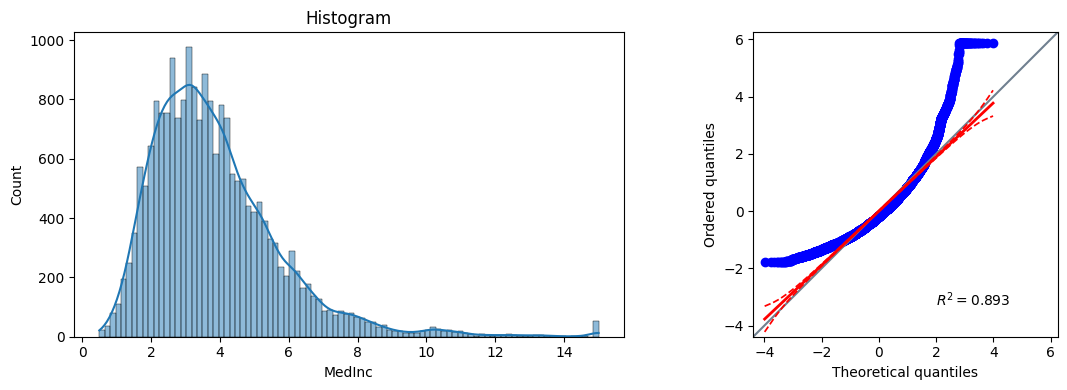

before apply transformation | skewness: 1.65 | kurtosis: 1.65


*** HouseAge ***


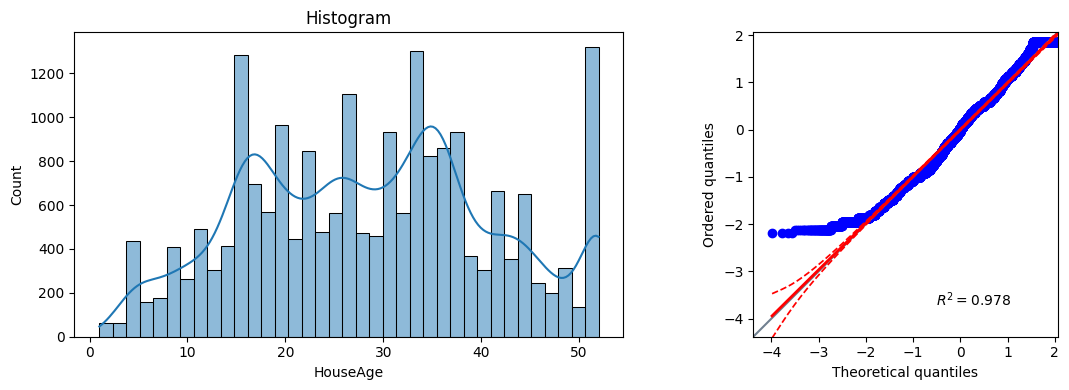

before apply transformation | skewness: 0.06 | kurtosis: 0.06


*** target ***


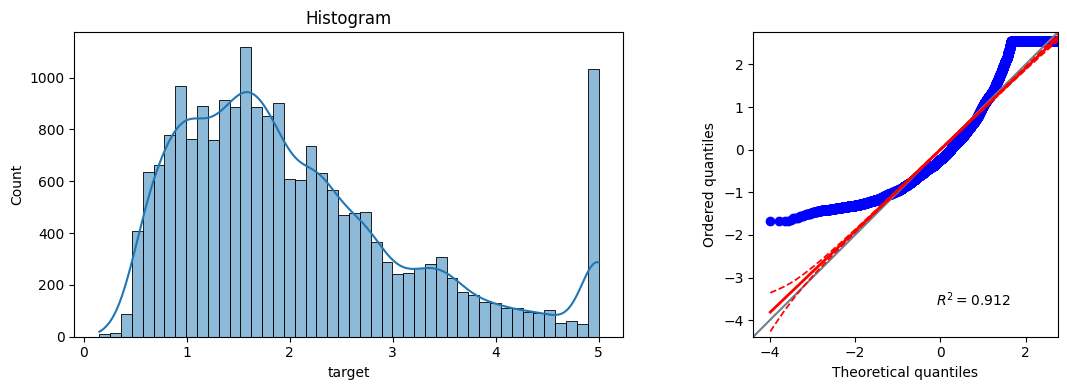

before apply transformation | skewness: 0.98 | kurtosis: 0.98




In [40]:
distribution_before_applying_transformer(df)

In [42]:
pipeline = Pipeline([
    ('reciprocal', vt.ReciprocalTransformer())
])
df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,MedInc,HouseAge,target
0,0.120117,0.024390,0.220946
1,0.120462,0.047619,0.278940
2,0.137790,0.019231,0.284010
3,0.177208,0.019231,0.292997
4,0.259997,0.019231,0.292227


*** MedInc ***
Before | skewness: 1.65 | kurtosis: 1.65
After | skewness: 2.45 | kurtosis: 2.45


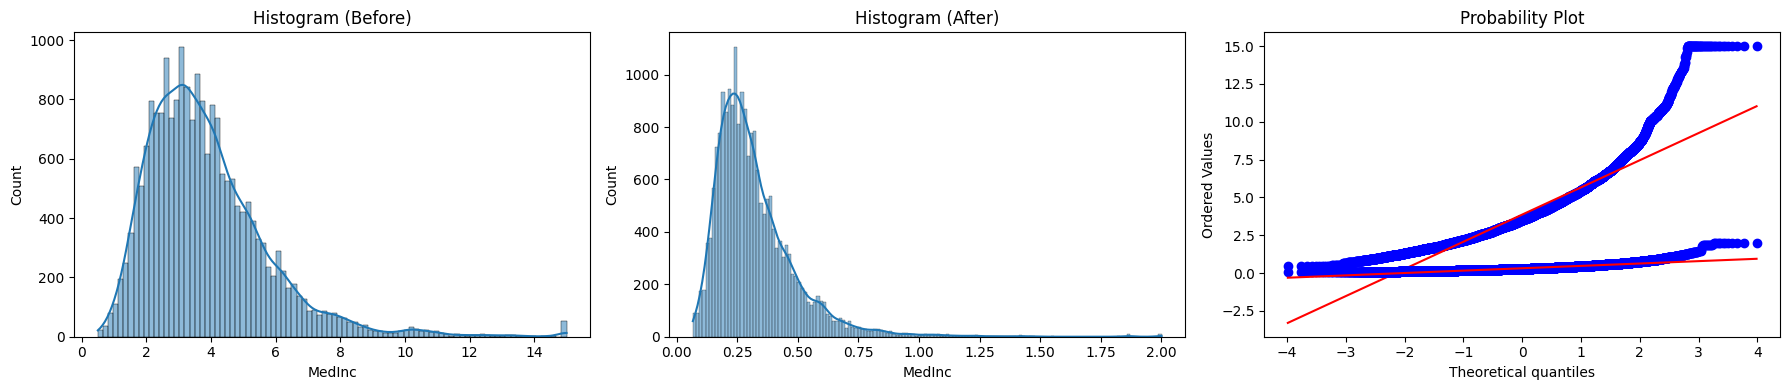



*** HouseAge ***
Before | skewness: 0.06 | kurtosis: 0.06
After | skewness: 5.72 | kurtosis: 5.72


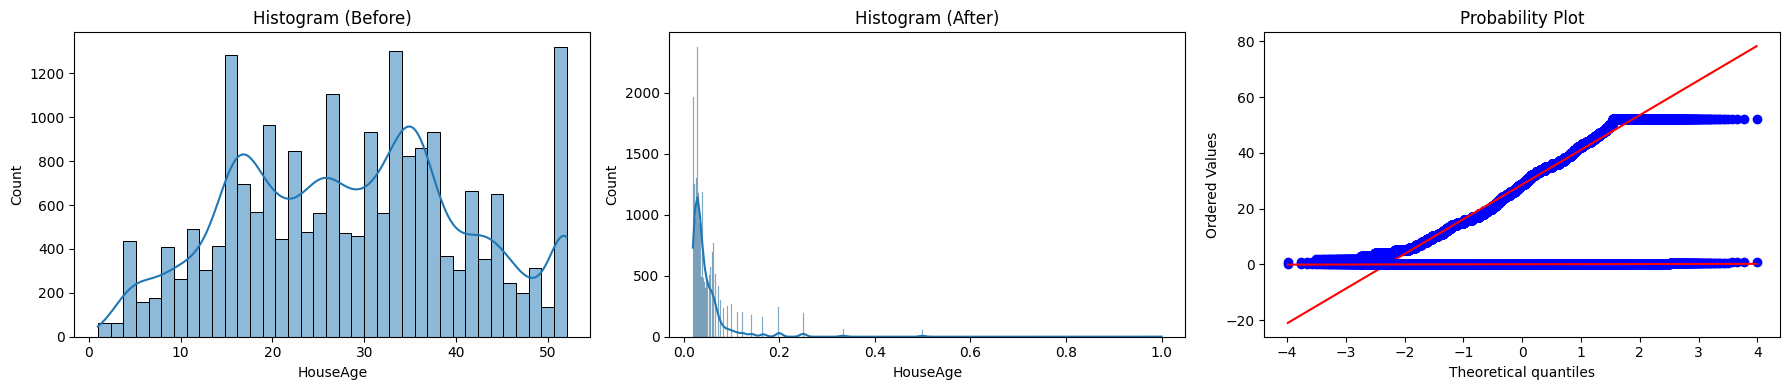



*** target ***
Before | skewness: 0.98 | kurtosis: 0.98
After | skewness: 2.21 | kurtosis: 2.21


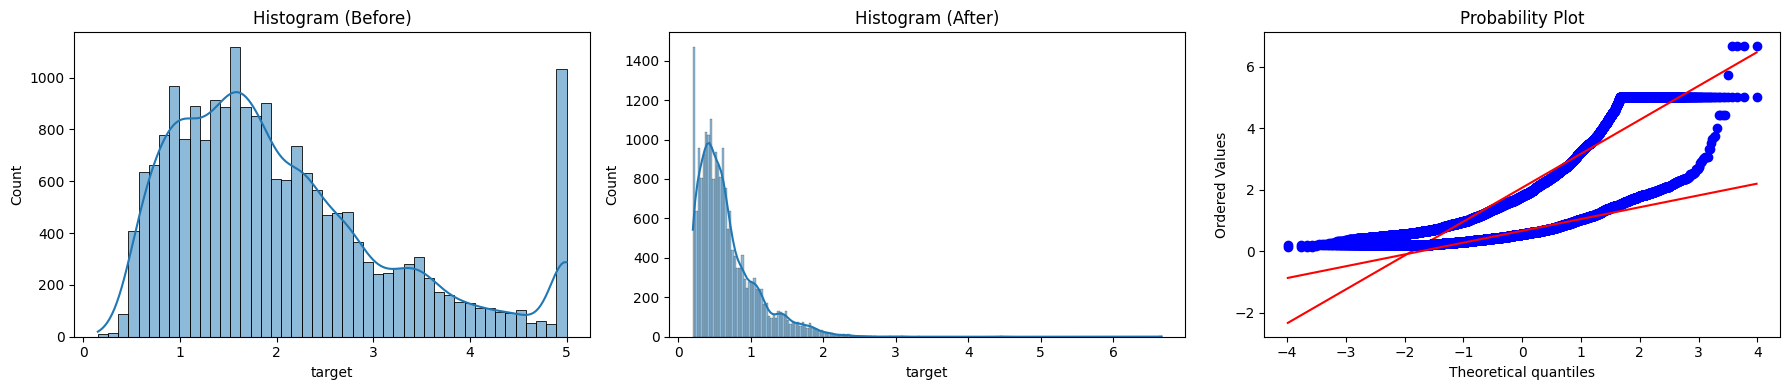

In [44]:
distribution_before_and_after_transformer(df, df_transformed)

### Power Transformer --- Applies exponential transformations to numerical variables

In [45]:
data_cali = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data_cali.data, columns=data_cali.feature_names)
df['target'] = pd.Series(data_cali.target)
df = df.filter(['MedInc', 'HouseAge', 'target'])
df.head()

,MedInc,HouseAge,target
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


In [46]:
pipeline = Pipeline([
    ('pt', vt.PowerTransformer())
])
df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,MedInc,HouseAge,target
0,2.885342,6.403124,2.127440
1,2.881215,4.582576,1.893410
2,2.693956,7.211103,1.876433
3,2.375521,7.211103,1.847431
4,1.961173,7.211103,1.849865


*** MedInc ***
Before | skewness: 1.65 | kurtosis: 1.65
After | skewness: 0.69 | kurtosis: 0.69


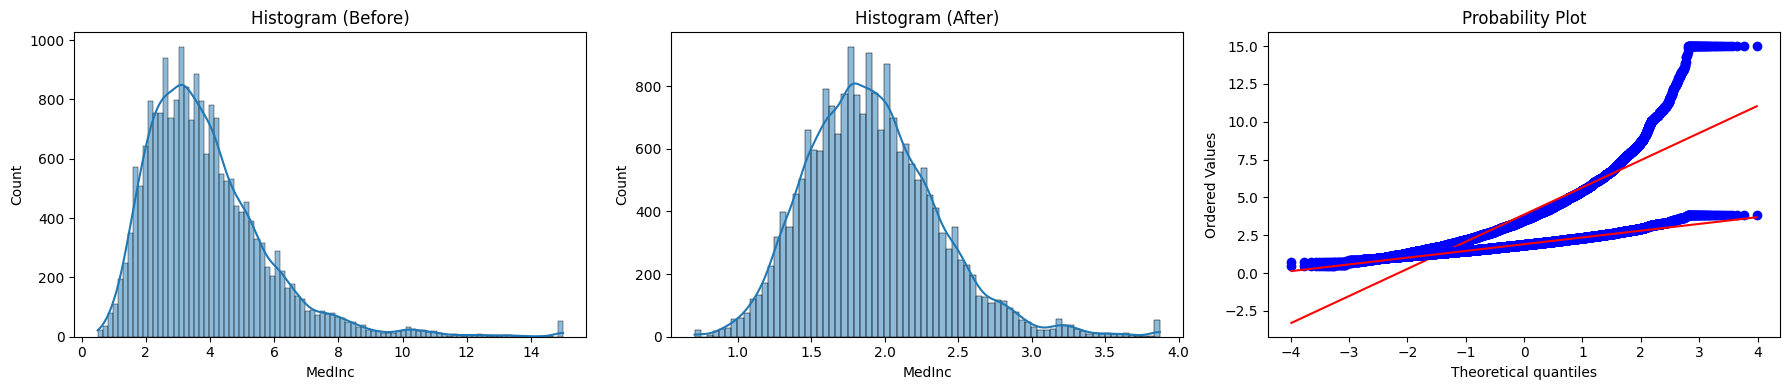



*** HouseAge ***
Before | skewness: 0.06 | kurtosis: 0.06
After | skewness: -0.47 | kurtosis: -0.47


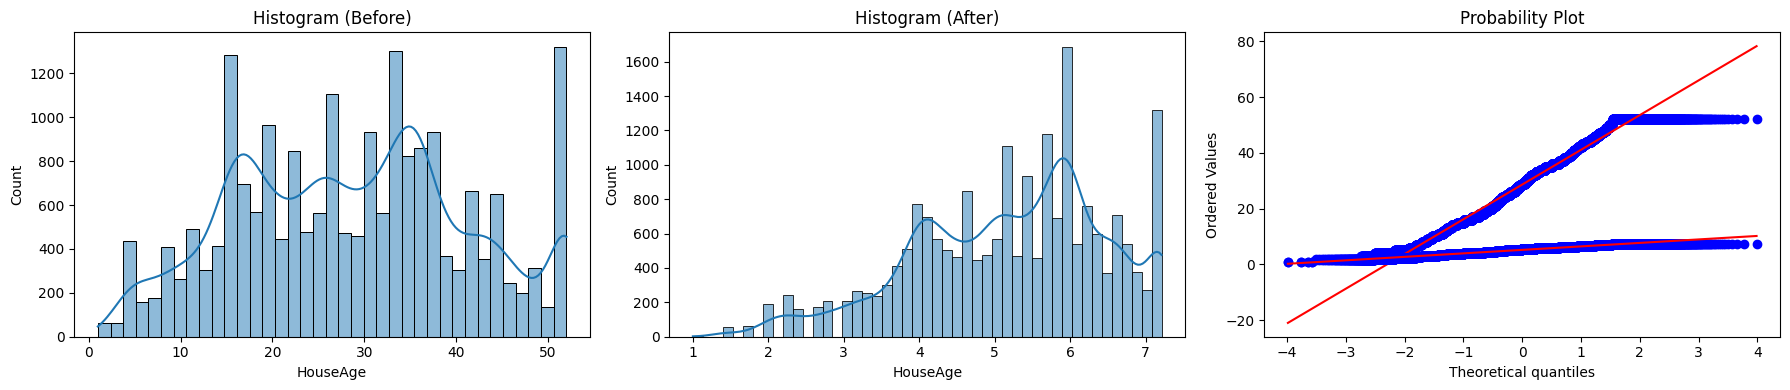



*** target ***
Before | skewness: 0.98 | kurtosis: 0.98
After | skewness: 0.44 | kurtosis: 0.44


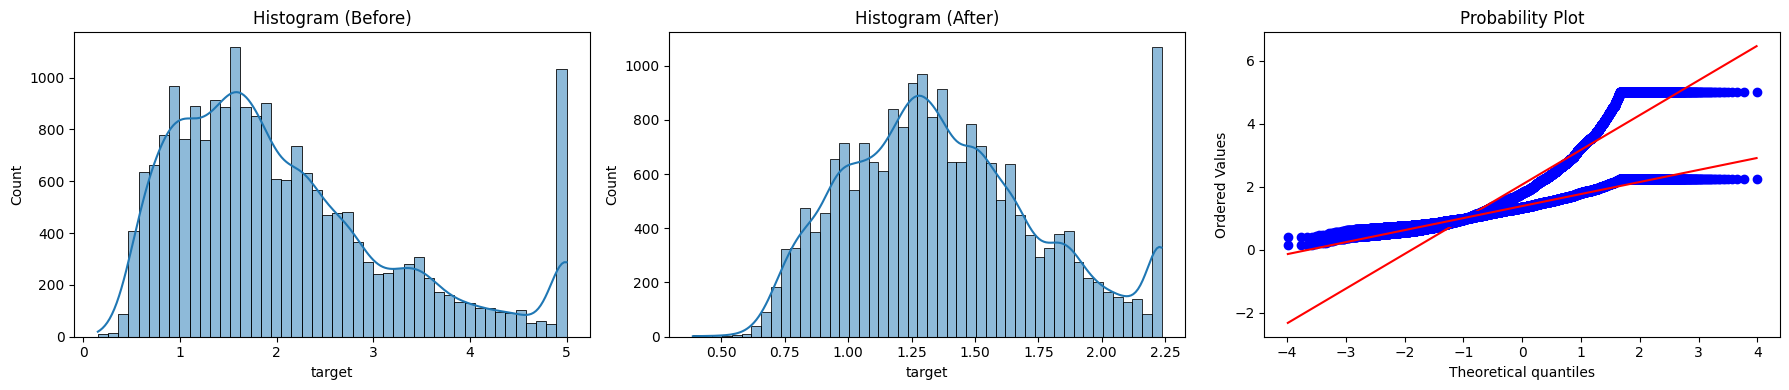

In [47]:
distribution_before_and_after_transformer(df, df_transformed)

In [19]:
data_cali = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data_cali.data, columns=data_cali.feature_names)
df['target'] = pd.Series(data_cali.target)
df = df.filter(['MedInc', 'HouseAge', 'target'])
df.head()

,MedInc,HouseAge,target
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


#### Box Cox Transformer

In [20]:
pipeline = Pipeline([
    ('pt', vt.BoxCoxTransformer())
])
df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,MedInc,HouseAge,target
0,2.337069,23.723216,1.661390
1,2.333598,13.286954,1.384055
2,2.171691,29.017459,1.362955
3,1.873879,29.017459,1.326576
4,1.432988,29.017459,1.329645


*** MedInc ***
Before | skewness: 1.65 | kurtosis: 1.65
After | skewness: 0.0 | kurtosis: 0.0


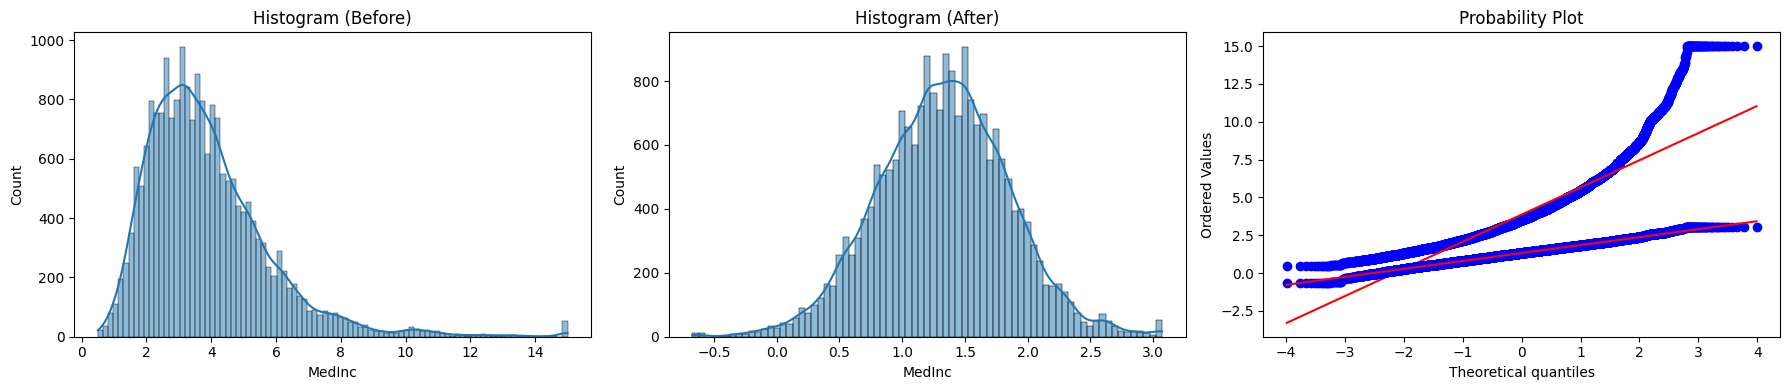



*** HouseAge ***
Before | skewness: 0.06 | kurtosis: 0.06
After | skewness: -0.12 | kurtosis: -0.12


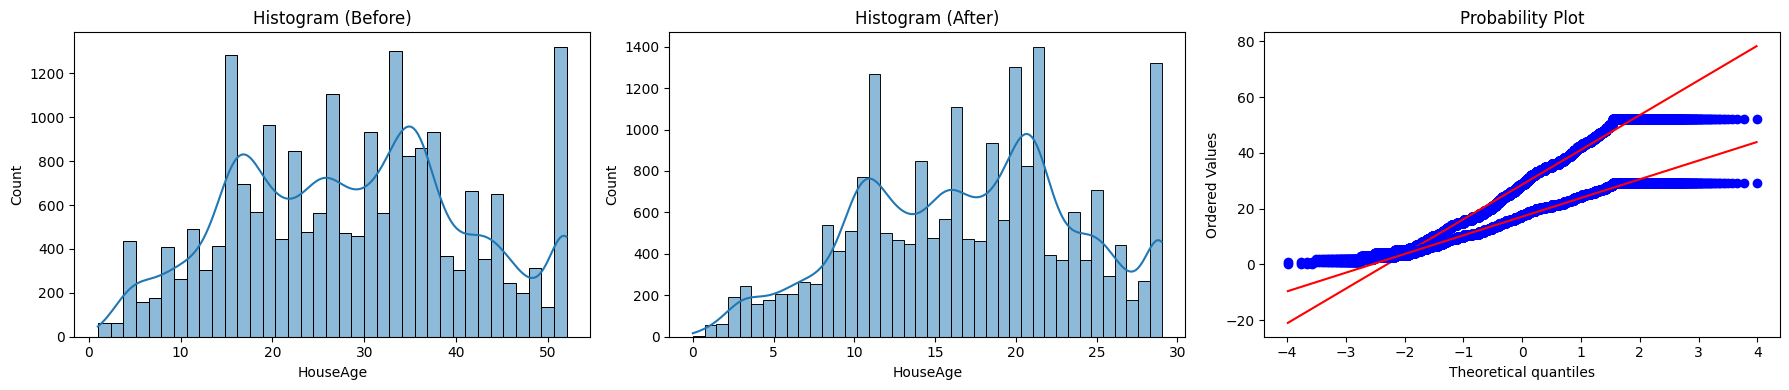



*** target ***
Before | skewness: 0.98 | kurtosis: 0.98
After | skewness: -0.01 | kurtosis: -0.01


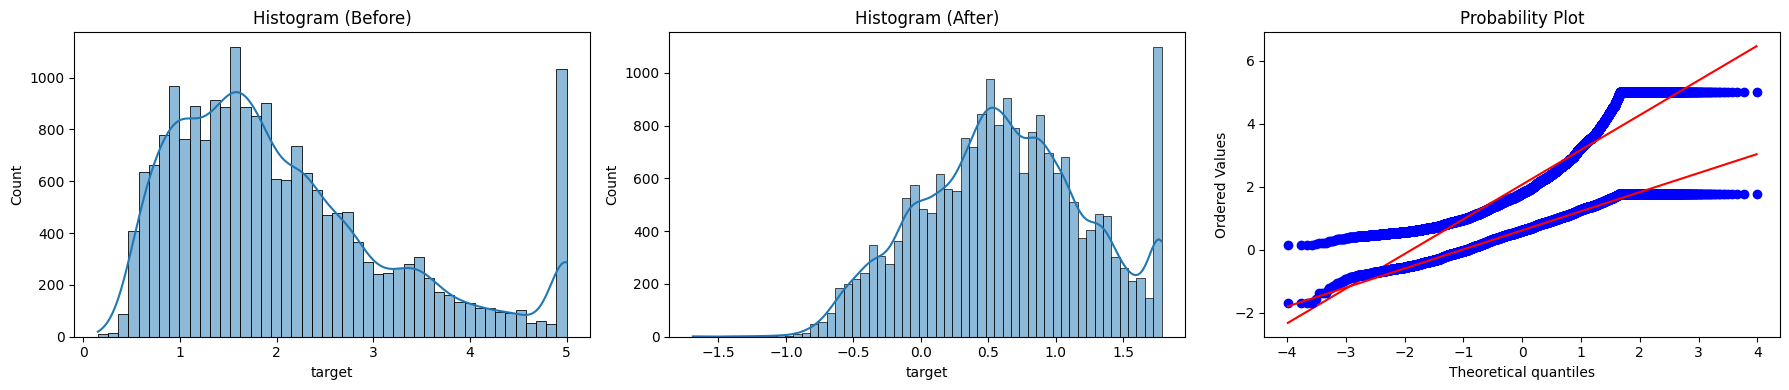

In [21]:
distribution_before_and_after_transformer(df, df_transformed)

#### Yeo Johnson Transformer

In [39]:
data_cali = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data_cali.data, columns=data_cali.feature_names)
df['target'] = pd.Series(data_cali.target)
df = df.filter(['MedInc', 'HouseAge', 'target'])
df.head()

,MedInc,HouseAge,target
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


In [42]:
pipeline = Pipeline([
    ('yj', vt.YeoJohnsonTransformer()),
    
])
df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,MedInc,HouseAge,target
0,1.803599,24.133444,1.286075
1,1.801958,13.807367,1.180093
2,1.724579,29.380778,1.171829
3,1.578385,29.380778,1.157517
4,1.354895,29.380778,1.158728


*** MedInc ***
Before | skewness: 1.65 | kurtosis: 1.65
After | skewness: -0.0 | kurtosis: -0.0


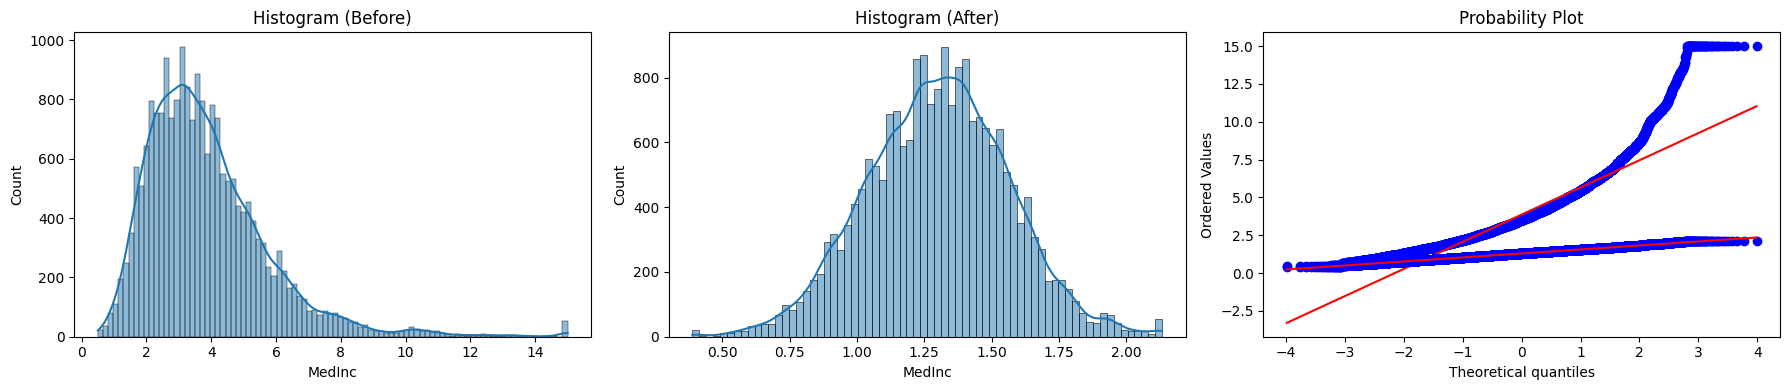



*** HouseAge ***
Before | skewness: 0.06 | kurtosis: 0.06
After | skewness: -0.11 | kurtosis: -0.11


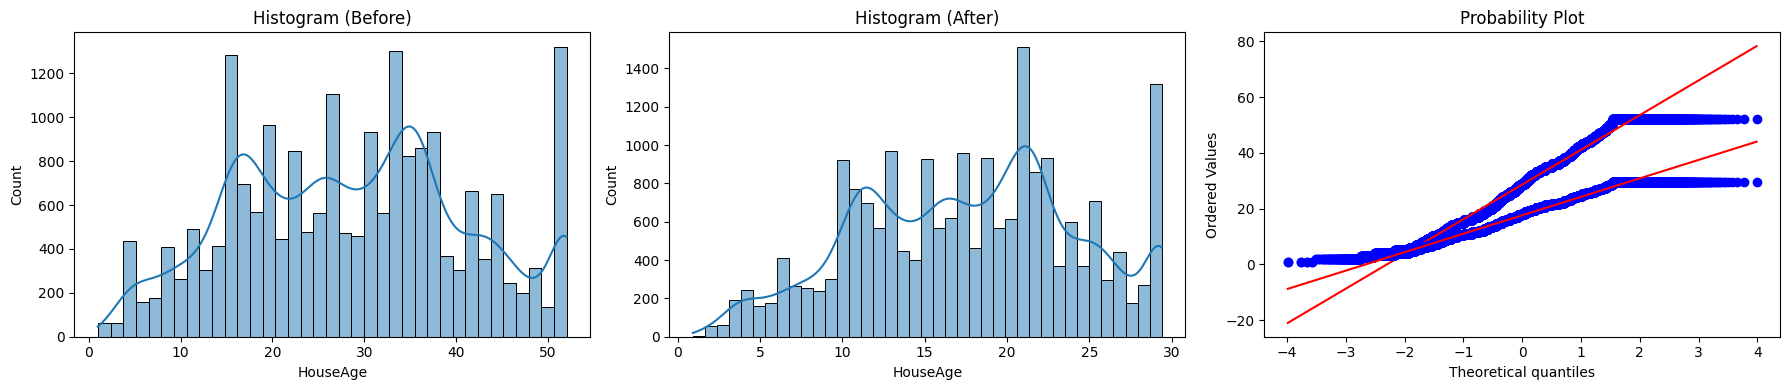



*** target ***
Before | skewness: 0.98 | kurtosis: 0.98
After | skewness: 0.03 | kurtosis: 0.03


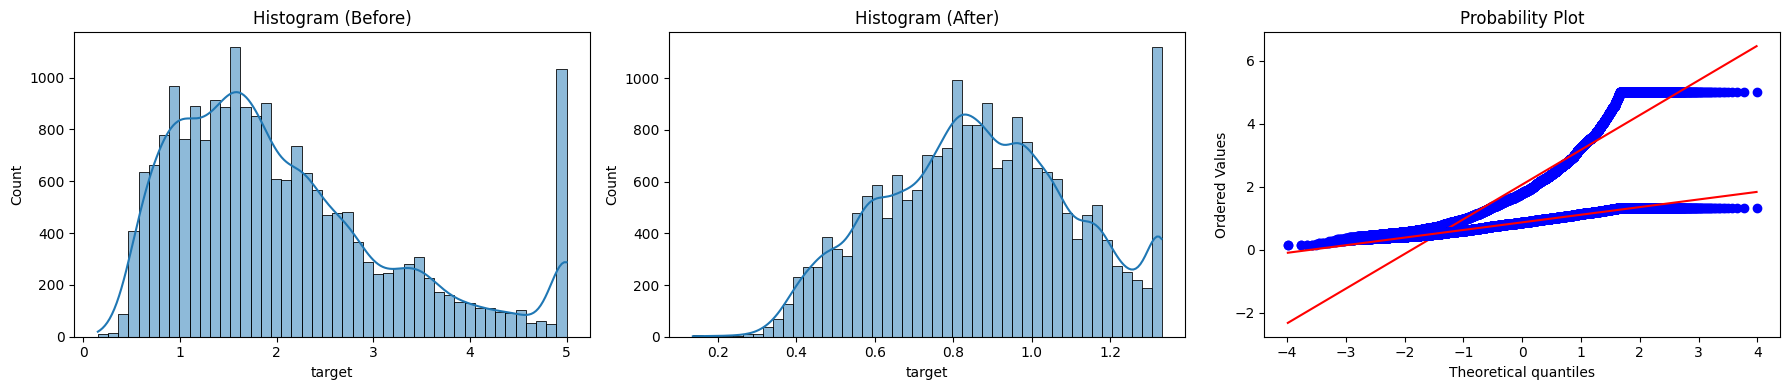

In [25]:
distribution_before_and_after_transformer(df, df_transformed)

### Handle Variable Discretization ---- Create interval variables related to the numerical distribution. Group by age ranges, for example. 

#### EqualFrequencyDiscretiser ----- Depending on the frequency
#### EqualWidthDiscretiser ---- Depending on the width
#### ArbitraryDiscretiser ---- However you decide

#### Equal Frequency

In [7]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.pipeline import Pipeline



In [19]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
data_cali = fetch_california_housing()
df = pd.DataFrame(data_cali.target, columns=['target']).round(1)
df.head()

,target
0,4.5
1,3.6
2,3.5
3,3.4
4,3.4


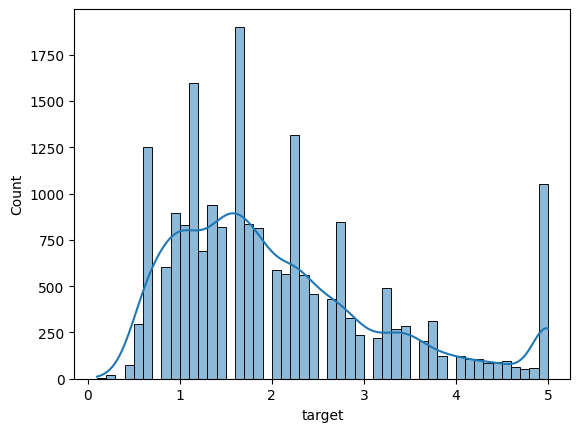

In [11]:
sns.histplot(data=df, x='target', kde=True)
plt.show()

In [14]:
pipeline = Pipeline([
    ('discretiser', EqualFrequencyDiscretiser(q=5, variables=['target']))
])

# Fit and transform the data using the pipeline
df_transformed = pipeline.fit_transform(df)

# Print the transformed DataFrame
print(df_transformed.head())

   target
0       4
1       4
2       4
3       4
4       4


In [18]:
discretiser_transformer = pipeline.named_steps['discretiser']

# Access the binner_dict_ attribute
binner_dict = discretiser_transformer.binner_dict_
binner_dict


{'target': [-inf, 1.1, 1.6, 2.1, 2.9, inf]}

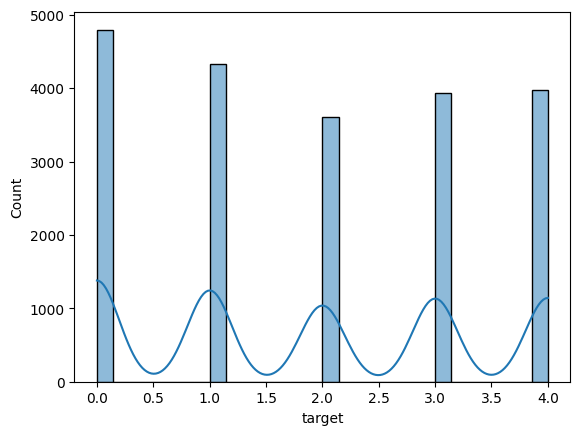

In [16]:
sns.histplot(data=df_transformed, x='target', kde=True)
plt.show()

#### Equal Width ---- Divides continuous numerical variables into intervals of the same width

In [20]:
from feature_engine.discretisation import EqualWidthDiscretiser


In [22]:
df.head()

,target
0,4.5
1,3.6
2,3.5
3,3.4
4,3.4


In [23]:
pipeline = Pipeline([
    ('equalwidth', EqualWidthDiscretiser(bins=6, variables=['target']))
    
])
df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,target
0,5
1,4
2,4
3,4
4,4


In [24]:
pipeline['equalwidth'].binner_dict_

{'target': [-inf,
  0.9166666666666667,
  1.7333333333333336,
  2.5500000000000003,
  3.366666666666667,
  4.183333333333334,
  inf]}

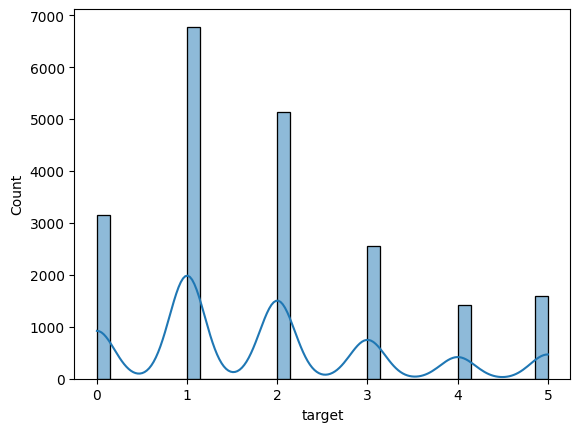

In [25]:
sns.histplot(data=df_transformed, x='target', kde=True)
plt.show()

#### Arbitrary Discretiser ----- It divides continuous range intervals with limits determined by the user

In [26]:
from feature_engine.discretisation import ArbitraryDiscretiser

In [27]:
data_cali = fetch_california_housing()
df = pd.DataFrame(data_cali.target, columns=['target']).round(1)
df.head()

,target
0,4.5
1,3.6
2,3.5
3,3.4
4,3.4


In [30]:
import numpy as np # we import NumPy to set -inf and +inf
pipeline = Pipeline([
    ('arbitdiscret', ArbitraryDiscretiser(binning_dict={'target':[-np.inf, 0.5, 1.5, 2.5, np.inf]}))
    
])
df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,target
0,3
1,3
2,3
3,3
4,3


In [32]:
pipeline['arbitdiscret'].binner_dict_

{'target': [-inf, 0.5, 1.5, 2.5, inf]}

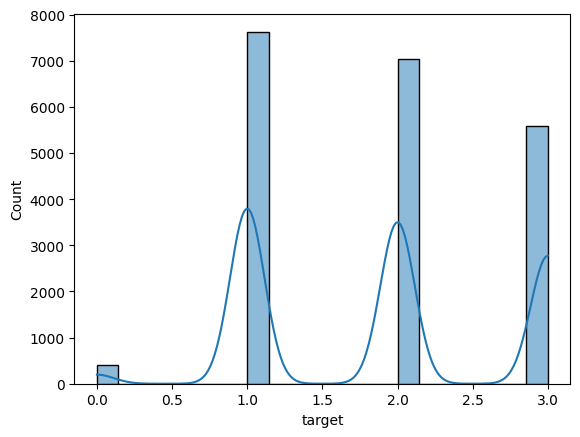

In [34]:
sns.histplot(data=df_transformed, x='target', kde=True)
plt.show()

### Handle Outliers

#### Winsorizer
#### Arbitrary capper
#### Outlier Trimmer

#### Winsorizer ---- Caps the outliers as maximum and/or minimum values of a continuous variable

In [6]:
from feature_engine.outliers import Winsorizer

In [7]:
df = sns.load_dataset('titanic').filter(['age', 'fare'])
print(df.shape)
df.head()

(891, 2)


,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [8]:
def plot_histogram_and_boxplot(df):
    # Create a figure with subplots
    num_cols = len(df.columns)
    fig, axes = plt.subplots(num_cols, 2, figsize=(10, num_cols * 6))

    # Iterate over each column
    for i, col in enumerate(df.columns):
        # Plot histogram
        sns.histplot(data=df, x=col, ax=axes[i, 0])
        axes[i, 0].set_title(f'{col} Histogram')

        # Calculate IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Calculate the range for non-outliers
        non_outlier_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

        # Plot boxplot with outliers
        sns.boxplot(data=df, x=col, ax=axes[i, 1], showfliers=False)
        axes[i, 1].set_title(f'{col} Boxplot')
        axes[i, 1].set_ylim(df[col].min(), df[col].max())

        # Mark the quartiles and IQR range
        axes[i, 1].axhline(q1, color='g', linestyle='--', label='Q1')
        axes[i, 1].axhline(q3, color='b', linestyle='--', label='Q3')
        axes[i, 1].axhline(df[col].median(), color='r', linestyle='--', label='Median')
        axes[i, 1].fill_between([1, 2], [q1, q1], [q3, q3], color='gray', alpha=0.4, label='IQR')

        # Identify and mark the outliers
        outliers = df[(df[col] < non_outlier_range[0]) | (df[col] > non_outlier_range[1])]
        axes[i, 1].scatter(outliers.index, outliers[col], color='red', label='Outliers')

        # Highlight the range of non-outliers
        axes[i, 1].axhline(non_outlier_range[0], color='orange', linestyle='-.', label='Non-Outlier Range')
        axes[i, 1].axhline(non_outlier_range[1], color='orange', linestyle='-.')
        axes[i, 1].legend()

        # Add description below the figure
        desc = f"Non-Outlier Range: {non_outlier_range[0]:.2f} to {non_outlier_range[1]:.2f}"
        axes[i, 1].text(0.5, -0.2, desc, transform=axes[i, 1].transAxes,
                        horizontalalignment='center', verticalalignment='center',
                        bbox={'facecolor': 'white', 'edgecolor': 'black', 'pad': 5})

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()

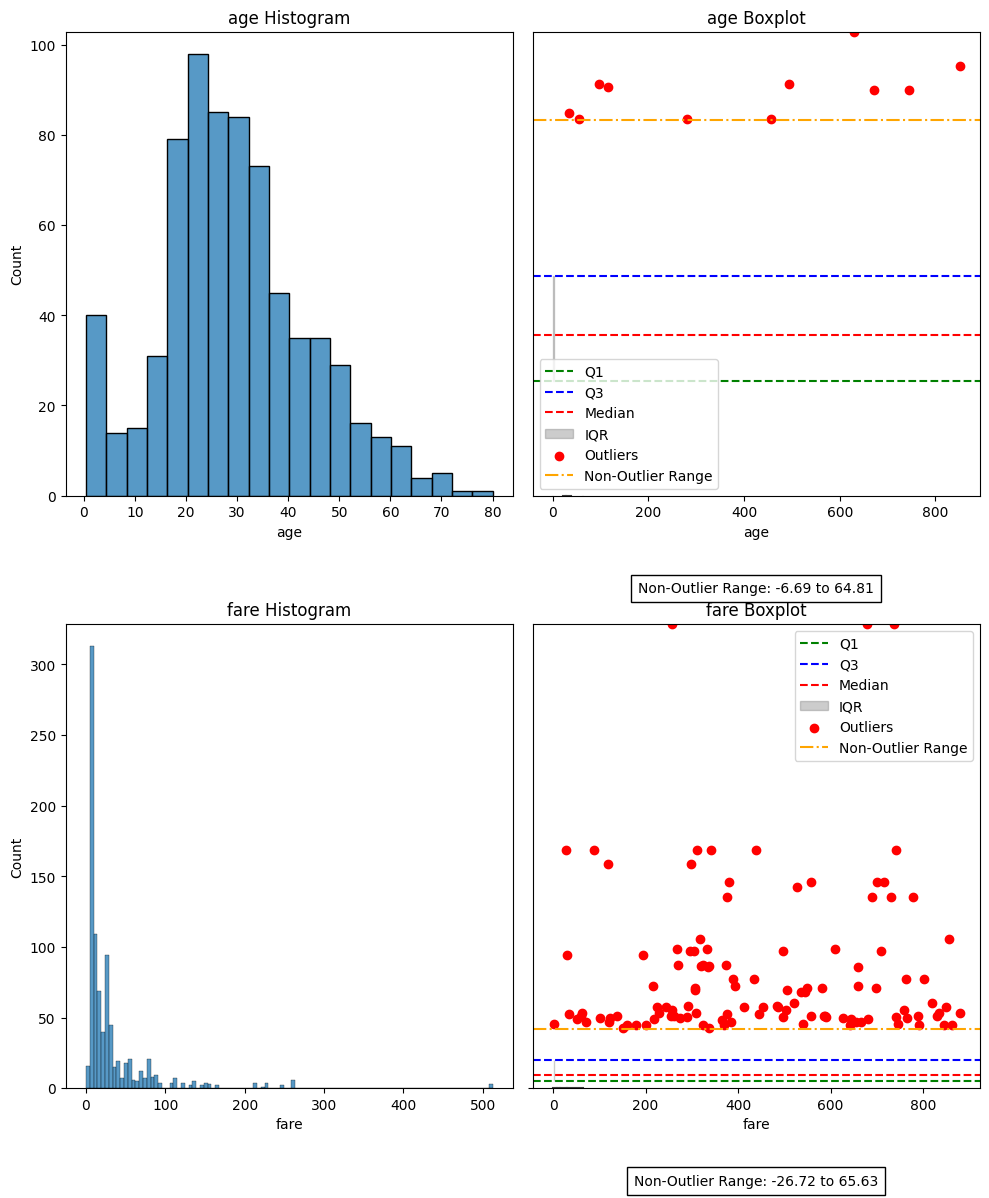

In [45]:
plot_histogram_and_boxplot(df)


In [10]:
from feature_engine.imputation import DropMissingData
pipeline = Pipeline([
    ('drop_na', DropMissingData()),
    ('winsorizer_iqr', Winsorizer(capping_method='iqr', fold=1.5, tail='both', variables=['age', 'fare']))
])
df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [11]:
pipeline['winsorizer_iqr'].right_tail_caps_

{'age': 64.8125, 'fare': 71.3625}

In [12]:
pipeline['winsorizer_iqr'].left_tail_caps_

{'age': -6.6875, 'fare': -29.937499999999996}



\ =========Before Transformation===========


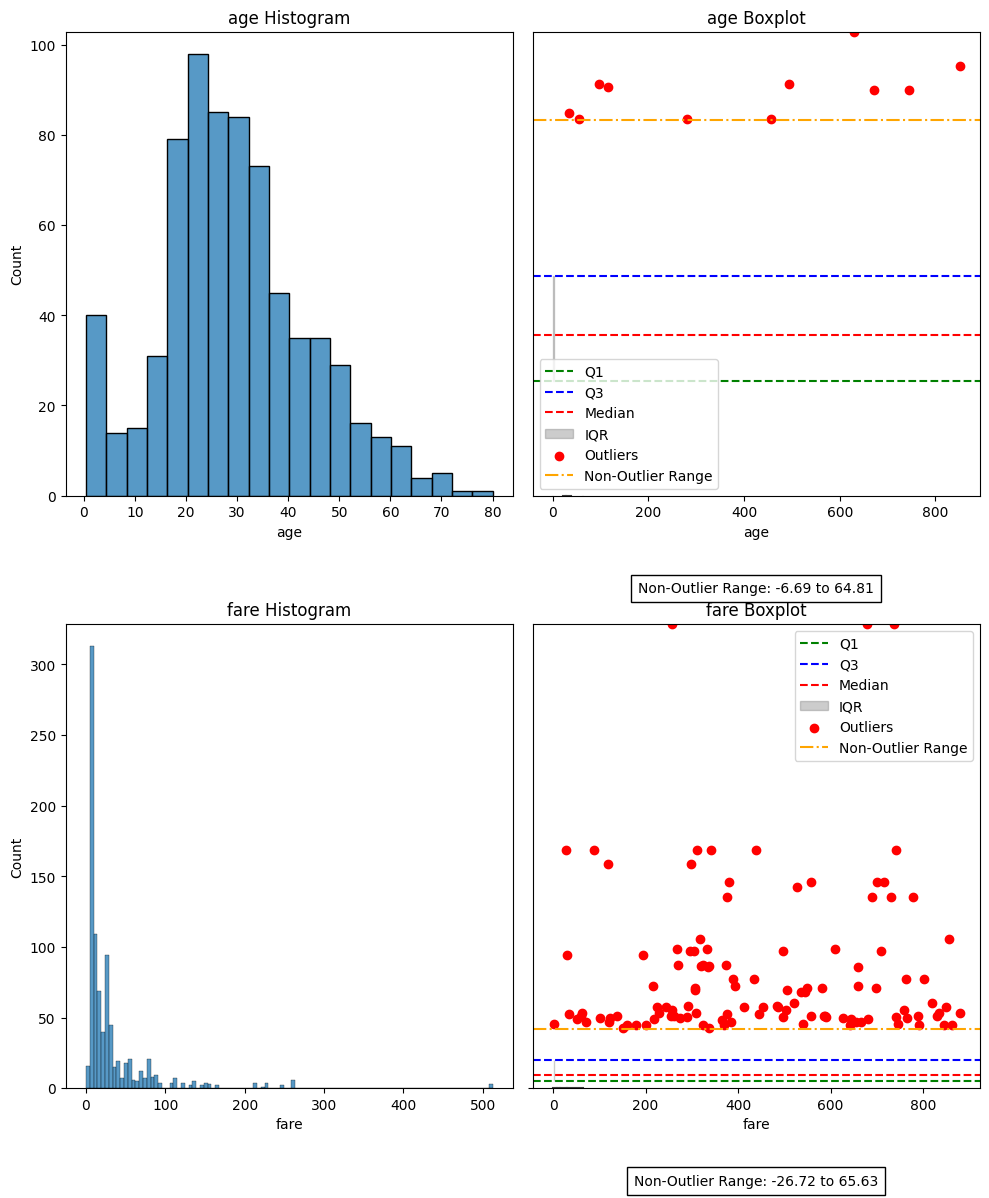



\ =========After Transformation===========


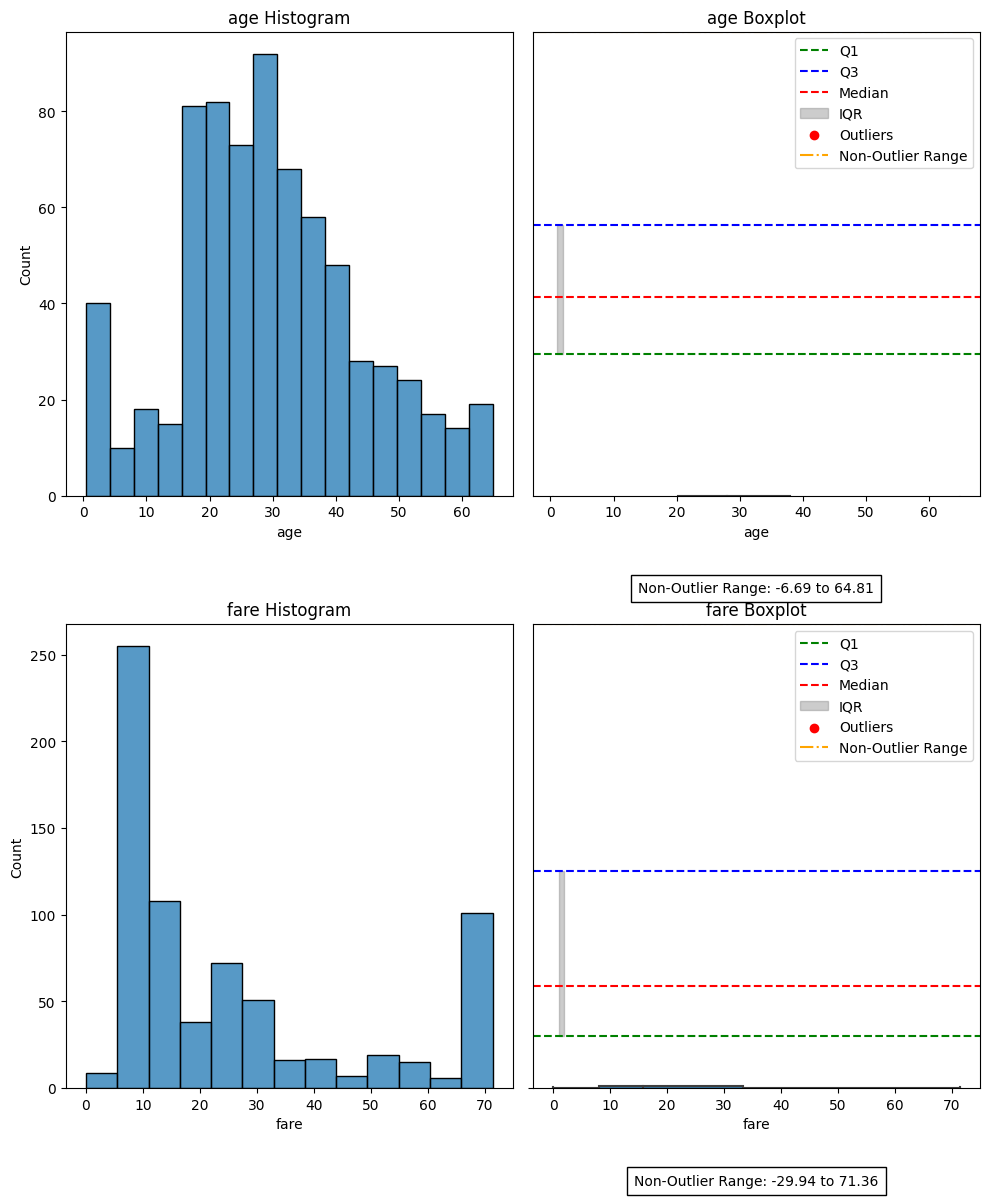

In [13]:
print("\n\n\ =========Before Transformation===========")
plot_histogram_and_boxplot(df)
print("\n\n\ =========After Transformation===========")
plot_histogram_and_boxplot(df=df_transformed)

#### Arbitrary Outlier Capper 

In [14]:
from feature_engine.outliers import ArbitraryOutlierCapper

In [15]:
df = sns.load_dataset('titanic').filter(['age', 'fare'])
print(df.shape)
df.head()

(891, 2)


,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


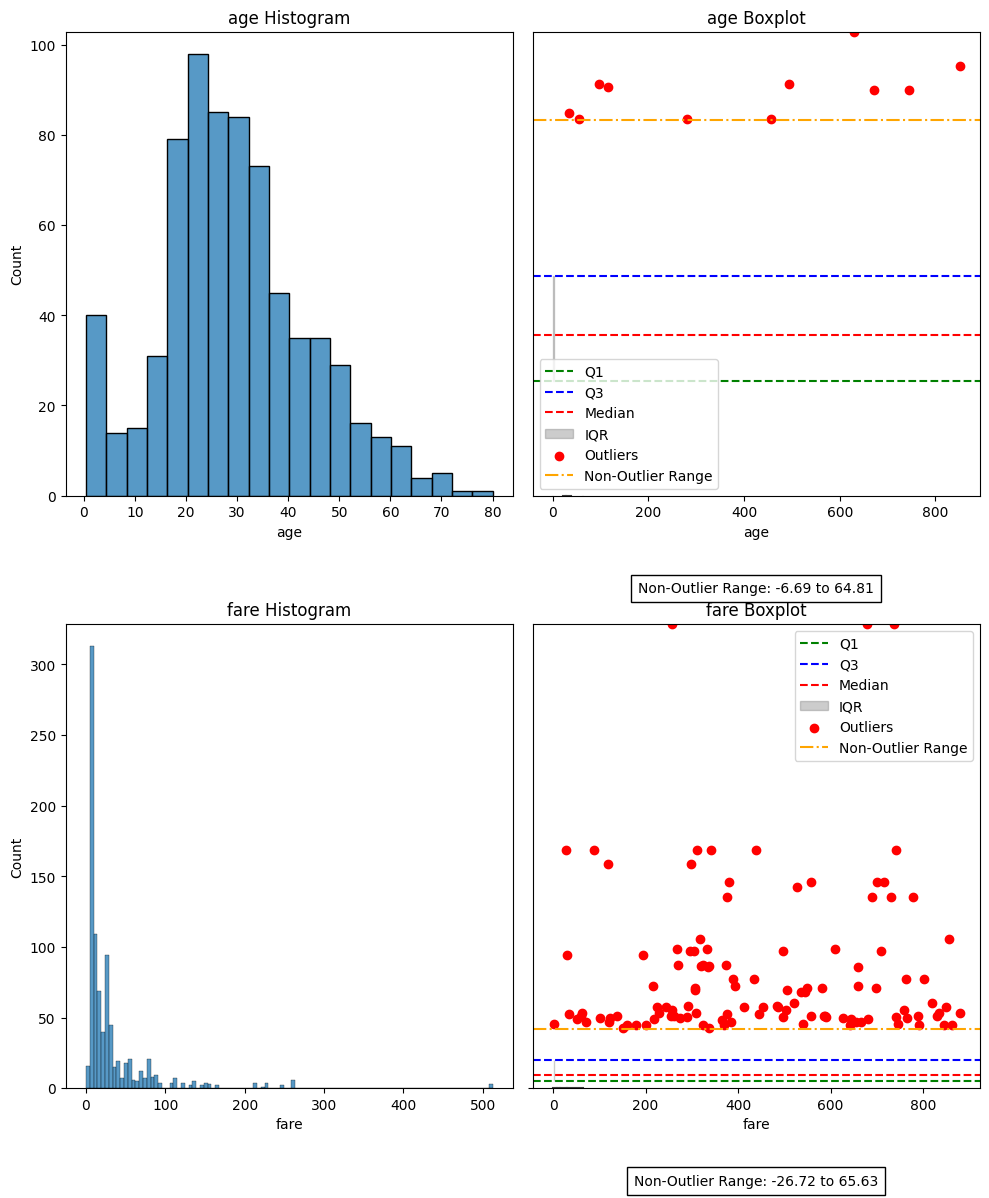

In [17]:
plot_histogram_and_boxplot(df)

In [18]:
from feature_engine.imputation import DropMissingData
pipeline = Pipeline([
    ('drop_na', DropMissingData()),
    ('arb', ArbitraryOutlierCapper(max_capping_dict={'fare':40, 'age':50}))
])
df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,age,fare
0,22.0,7.250
1,38.0,40.000
2,26.0,7.925
3,35.0,40.000
4,35.0,8.050




\ =========Before Transformation===========


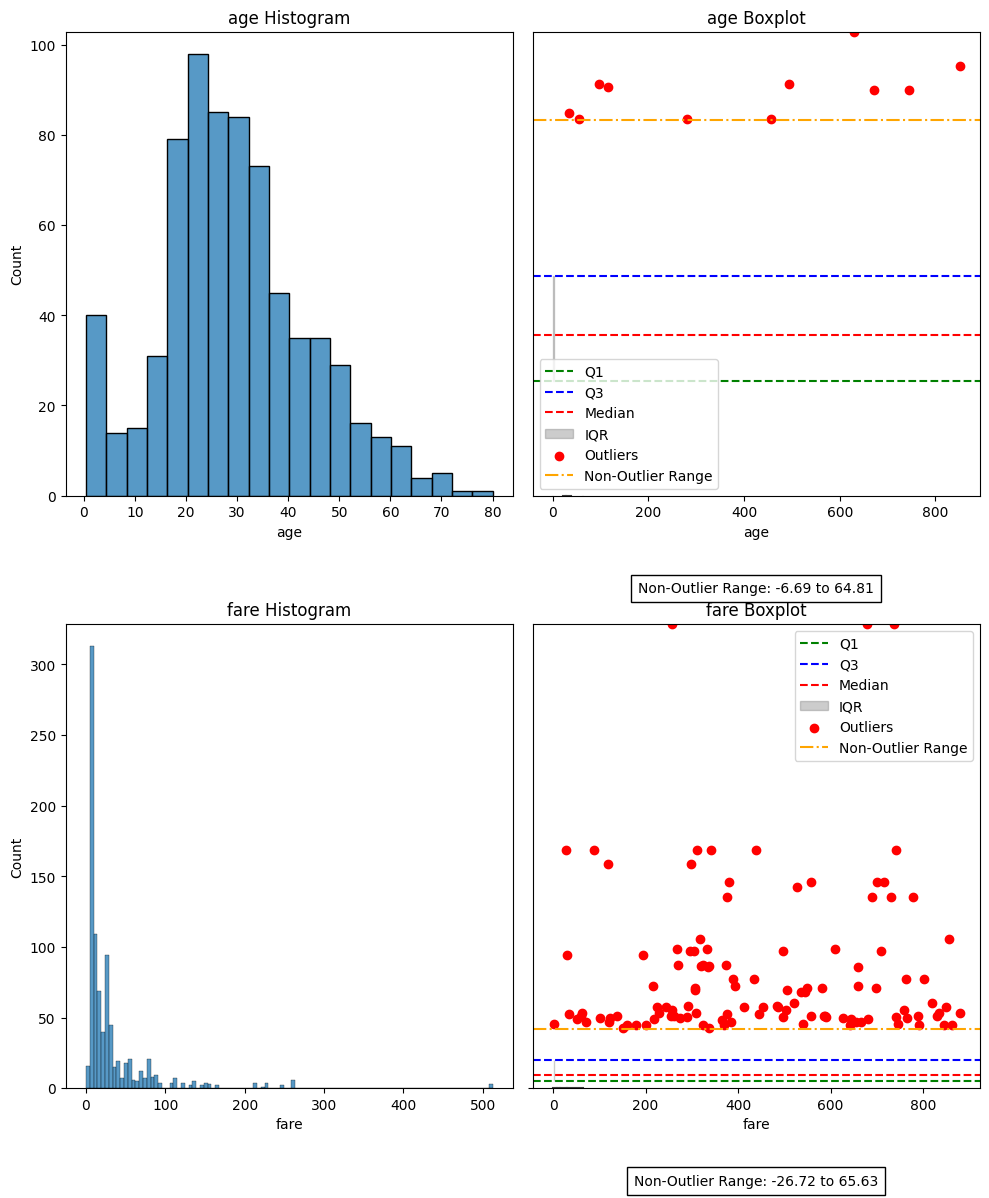



\ =========After Transformation===========


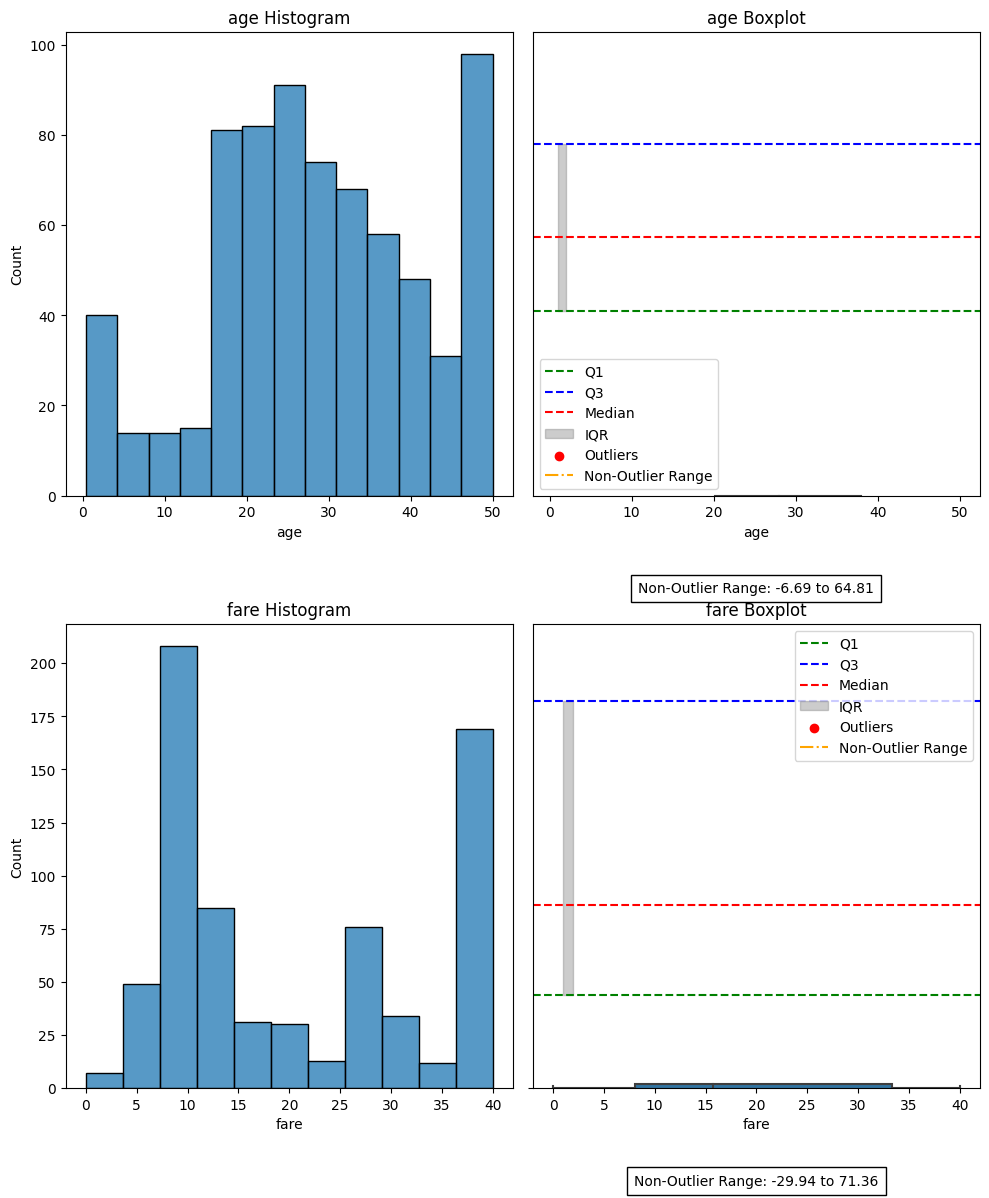

In [19]:
print("\n\n\ =========Before Transformation===========")
plot_histogram_and_boxplot(df)
print("\n\n\ =========After Transformation===========")
plot_histogram_and_boxplot(df=df_transformed)

#### Outlier Trimmer ----- Removes observations with outliers from the data

In [20]:
from feature_engine.outliers import OutlierTrimmer

In [30]:
df = sns.load_dataset('titanic').filter(['age', 'fare'])
print(df.shape)
df.head()

(891, 2)


,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [34]:
from feature_engine.imputation import DropMissingData
pipeline = Pipeline([
    ('drop_na', DropMissingData()),
    ('out_trimmer', OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both', variables=['age', 'fare'])),
    # Additional outlier handling steps can be added here
])

df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [35]:
print(df_transformed.shape)
df_transformed.head()

(609, 2)


,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500




\ =========Before Transformation===========


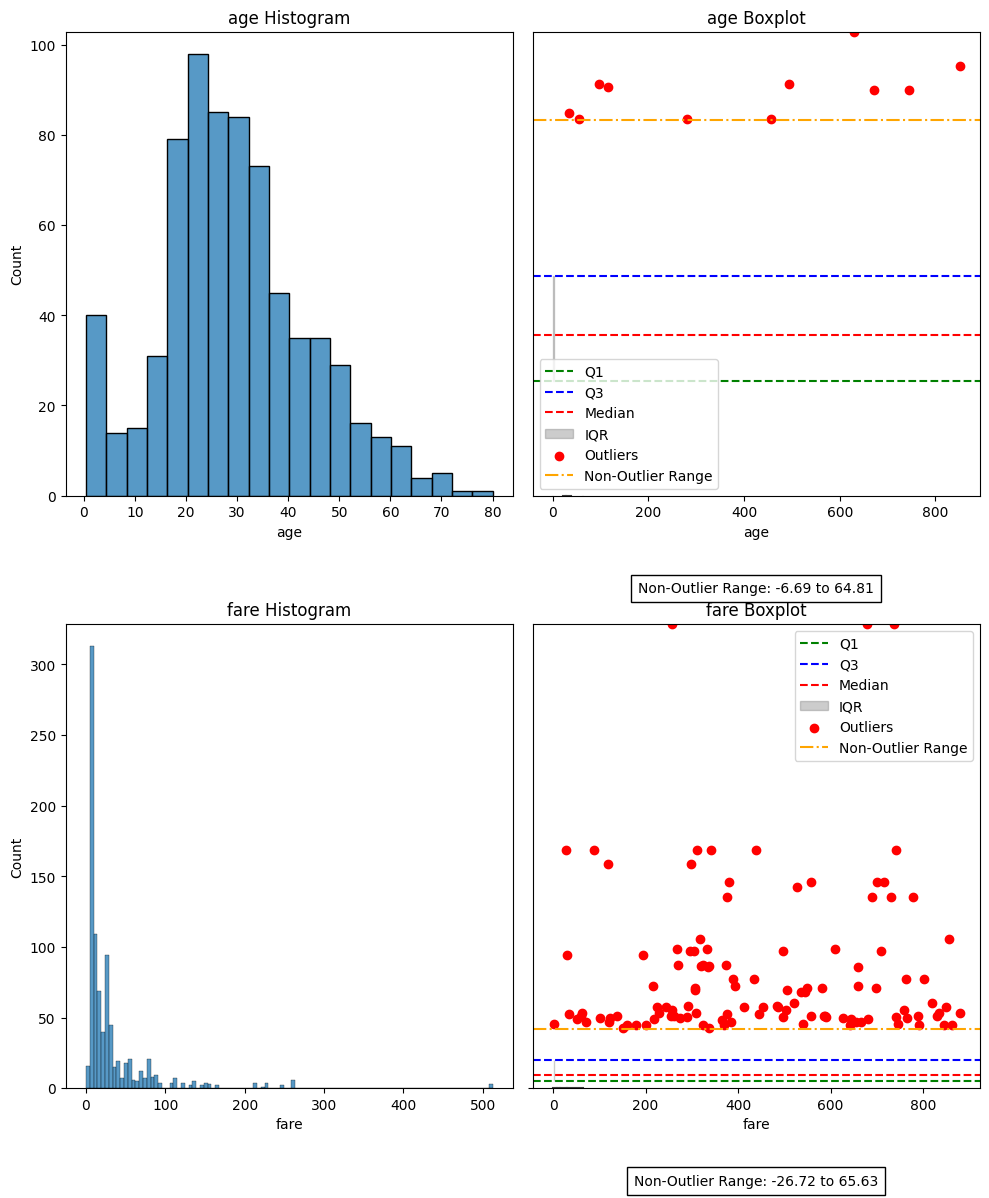



\ =========After Transformation===========


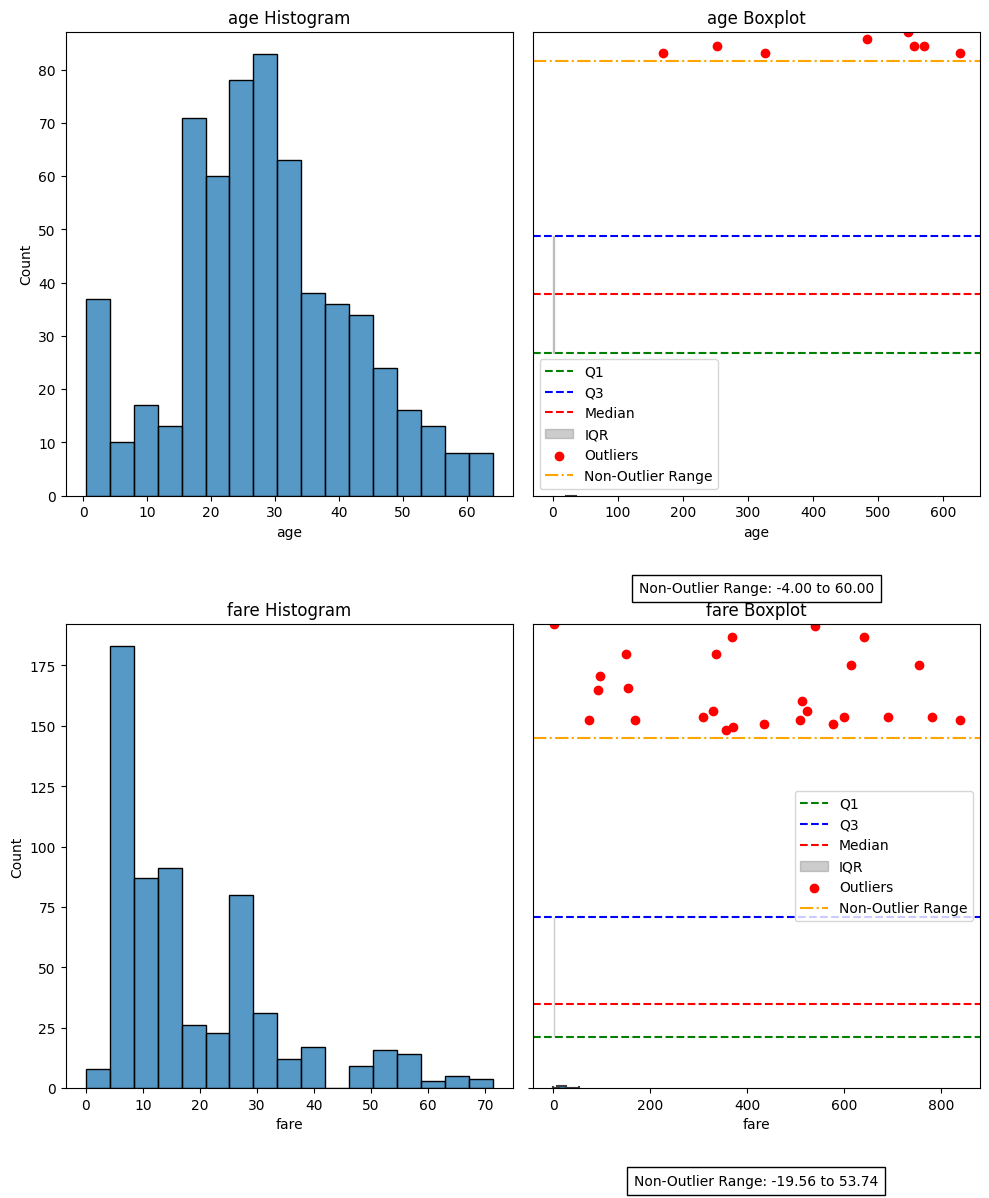

In [36]:
print("\n\n\ =========Before Transformation===========")
plot_histogram_and_boxplot(df)
print("\n\n\ =========After Transformation===========")
plot_histogram_and_boxplot(df=df_transformed)

### Drop Features ---- It drops a list of variables indicated by the analyst

In [6]:
from feature_engine.selection import DropFeatures

In [7]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
pipeline = Pipeline([
    ('drop', DropFeatures(features_to_drop=['sex', 'island']))
])

df_transformed = pipeline.fit_transform(df)
df_transformed

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


### Smart Correlated Features ----- Finds groups of correlated features from each group using 'Pearson' and 'Spearman' methods

In [11]:
from feature_engine.selection import SmartCorrelatedSelection

In [12]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [15]:
for col in df.select_dtypes(include='category').columns:
    df[col] = df[col].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [16]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [18]:
from feature_engine.encoding import OrdinalEncoder
pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(encoding_method='arbitrary')),
    ('SmartCorrelatedSelection', SmartCorrelatedSelection(method="pearson",
                                                          threshold = 0.6,
                                                          selection_method='variance',))
])

df_transformed = pipeline.fit_transform(df)
df_transformed

,total_bill,sex,smoker,day,size
0,16.99,0,0,0,2
1,10.34,1,0,0,3
2,21.01,1,0,0,3
3,23.68,1,0,0,2
4,24.59,0,0,0,4
...,...,...,...,...,...
239,29.03,1,0,1,3
240,27.18,0,1,1,2
241,22.67,1,1,1,2
242,17.82,1,0,1,2
